<h4>Import packages and define directories</h4>

In [1]:
import numpy as np, pandas as pd
import post_sequencing_analysis as psa
import os, re, glob
from matplotlib import pyplot as plt

## User defined variables listed here

experimentID = 'I2L2_230419-165250'

## Set default experiment ID for all following graphs

psa.FC.options['expID'] = experimentID

## Create "postsequence" subdirectory in current folder, then switch to that subdirectory

cwd = os.getcwd()
isExist = os.path.exists(".\\postsequence-"+experimentID)

if not isExist and "postsequence" not in cwd: # Prevents a chain of new directories
    os.mkdir(".\\postsequence-"+experimentID)

if os.path.basename(cwd) != "postsequence"+experimentID: # Change to postsequence directory if not already in it 
    os.chdir(".\\postsequence-"+experimentID)


print(cwd)

c:\Users\Christine\Documents\GitHub\post-sequencing-analysis


Compile BCQC data into .csv

User must define bcqc directory, e.g. <i>"\\\\SequliteNAS2\\Experiments\\b575x_230417-150636\\Instrument\\bcqc"</i>

Only run this if you have not already created the bcqc csv!


Option A: Read directly from the original directories

In [ ]:
## User defined variables listed here
# Define your bcqc directory

bcqc_dir = "\\\\SequliteNAS\\Experiments\\b484x_220628-173409\\Instrument\\bcqc\\Read1"
bcqc_dir2 = "C:\\Users\\Christine\\Documents\\GitHub\\post-sequencing-analysis\\postsequence-b575x_230417-150636\\bcqc_csv_Read1"


# Use "bcqc_read" for one of the subdirectories of bcqc, either "Read1" or "Index1"
# Be warned that this will be slow if you are running this function over a network

df = psa.bcqc_read(bcqc_dir2)

If you have already created the .csv in the past, go ahead and load it in directly

In [ ]:
## User defined variables listed here

filename = "b484x_bcqc-Read1.csv"

# Readout csv file

df = pd.read_csv(filename)

Plot BCQC

In [ ]:
fig, ax = psa.bcqc_mean_rfl_bylane(df,lanes=[1])

fig.savefig("example_graph.png",dpi=300,format="png")

Compile FBQC data into .csv

In [ ]:
fbqc_dir = "\\\\SequLiteNAS2\\Experiments\\b575x_230417-150636\\Instrument\\Index1\\OLA"
fbqc_dir2 = "C:\\Users\\Christine\\Documents\\GitHub\\post-sequencing-analysis\\postsequence-b484x_220628-173409\\fbqc_csv_Index1"
df = psa.fbqc_read(fbqc_dir2)
# psa.fbqc_copy(fbqc_dir)

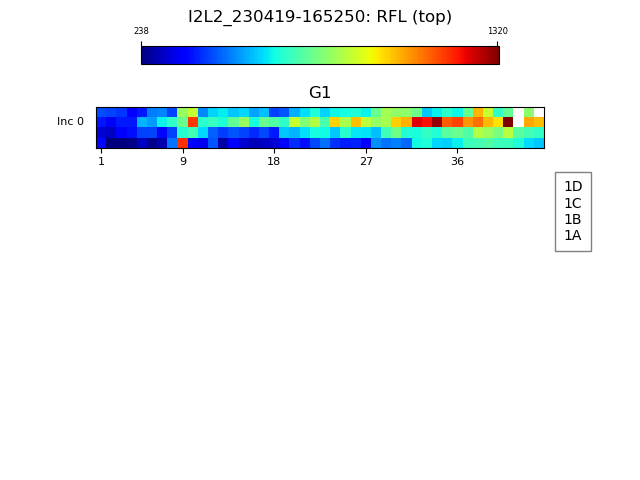

In [2]:
%matplotlib widget
df = pd.read_csv("fbqc-Read1_missing.csv")
# df = df.loc[df.tile_no.str.contains(r'[tb]L1\d{2}[AB]')]

# df = pd.read_csv("b484x_fbqc_Read1.csv")
# df = df.loc[df.tile_no.str.contains(r'[tb]L[23]\d{2}[AB]')]
fig, ax, dat = psa.fbqc_heatmap(df,'relative_intensity_mean',surface='t',chosen_cycles=[0],channels=['G1'])
# fig.savefig('example2.png',dpi=300,format='png')

In [ ]:
df = pd.read_csv("fbqc-Read1.csv")
fig, ax = psa.fbqc_plot_lines(df,"relative_intensity_mean",lanes=[1],half=['B','C'])

In [ ]:
fig, ax = psa.fbqc_mean_lane(df,"relative_intensity_mean",lanes=[1])

In [ ]:
psa.FC.tile_pattern

In [ ]:
array = np.array(["02","03","10"],dtype=np.int32)
array

In [ ]:
tile_pattern = re.compile(r"(?P<surf>[tb])L(?P<lane>\d)(?P<pos>\d{2})(?P<half>[A-Z])")
tile_df = df.tile_no.str.extract(tile_pattern)
# tf = tile_df[3] == 'D'
tile_df
# df[tf]

In [ ]:
tile_df.pos.astype(int)